### Week 16 DataCamp
### Linear Classifiers in Python

- Import dataset    
        import sklearn.datasets
        newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()
        X,y = newsgroups.data, newsgroups.target
- Import KNearest NEighbors Classifier
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors = 1)
        
        #fit data
        knn.fit(X,y)
        y_pred = knn.predict(X) # contains prediction from trained classifier
        #evaluate on seen data is not very helpful, need validation set
        knn.score(X,y)
        
        #default is 75-25 split
        from sklearn.model_selection import train_test_split
        X_train, x_test, y_train, y_test = train_test_split(X,y)
        knn.fit(X_train, y_train)
        knn.score(X_test, y_test)
- scikitlearn cheatsheeet: 
https://datacamp-community-prod.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116
- Overfitting
    - high training data score and low testing data score can show a model that overfits the data

##### Applying Logistic Regression and SVM
    from sklearn.linear_model import LogisticRegression
    lr=LogisticRegression()
    lr.fit(X_train, y_train)
    lr.predict(X_test)
    lr.score(X_test, y_test)

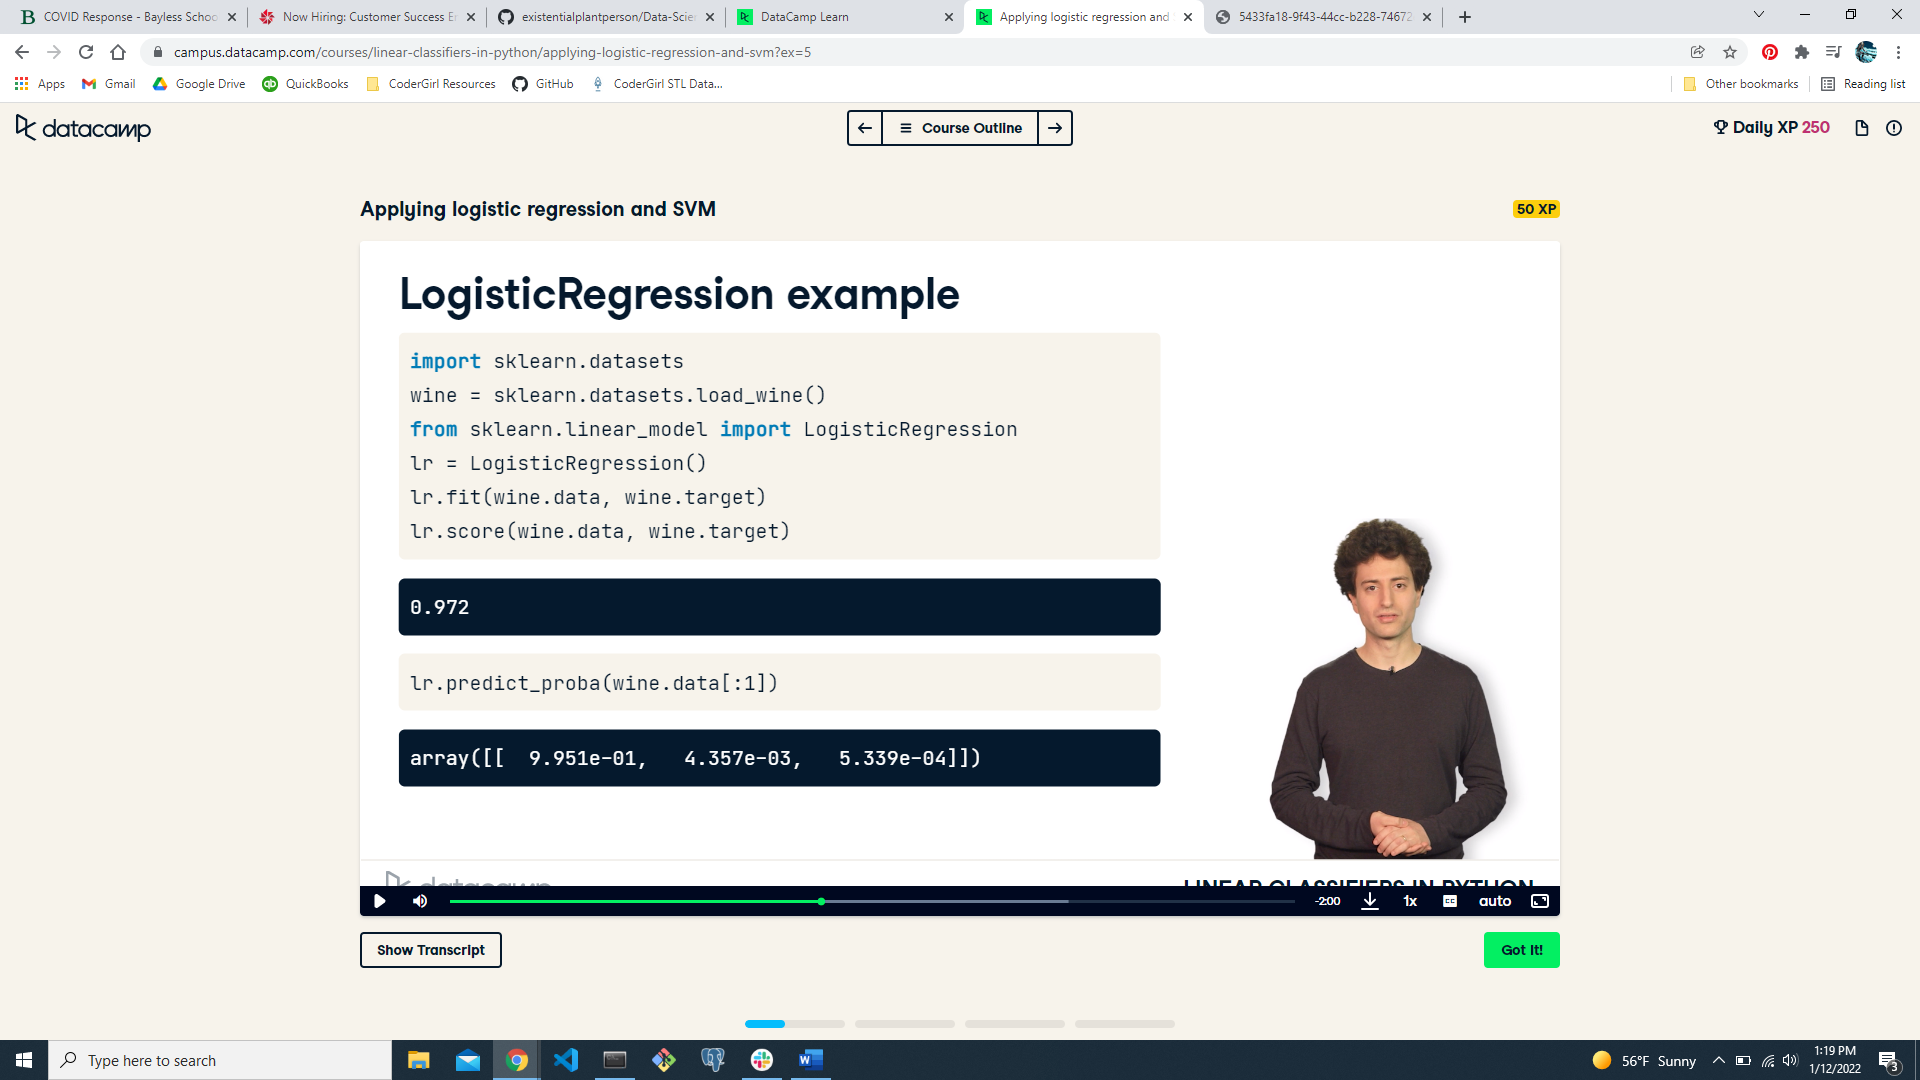

##### Using LinearSVC (Linear Support Vector Classifier)
- works same way as LogisticRegression
        import sklearn.datasets
        wine = sklearn.datasets.load_wine()
        from sklearn.svm import LinearSVC
        svm = SVC()  #default hyperparameters
        svm.fit(wine.data, wine.target)
        svm.score(wine.data, wine.target)
        
        #output = 1 for 100% fit of target to data
- underfitting - model too simple, low training accuracy
- overfitting - model too comples, low test accuracy

In [ ]:
# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

OUTPUT:
0.9955456570155902
0.9622222222222222
1.0
0.48

In [ ]:
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

##### Linear Decision Boundaries
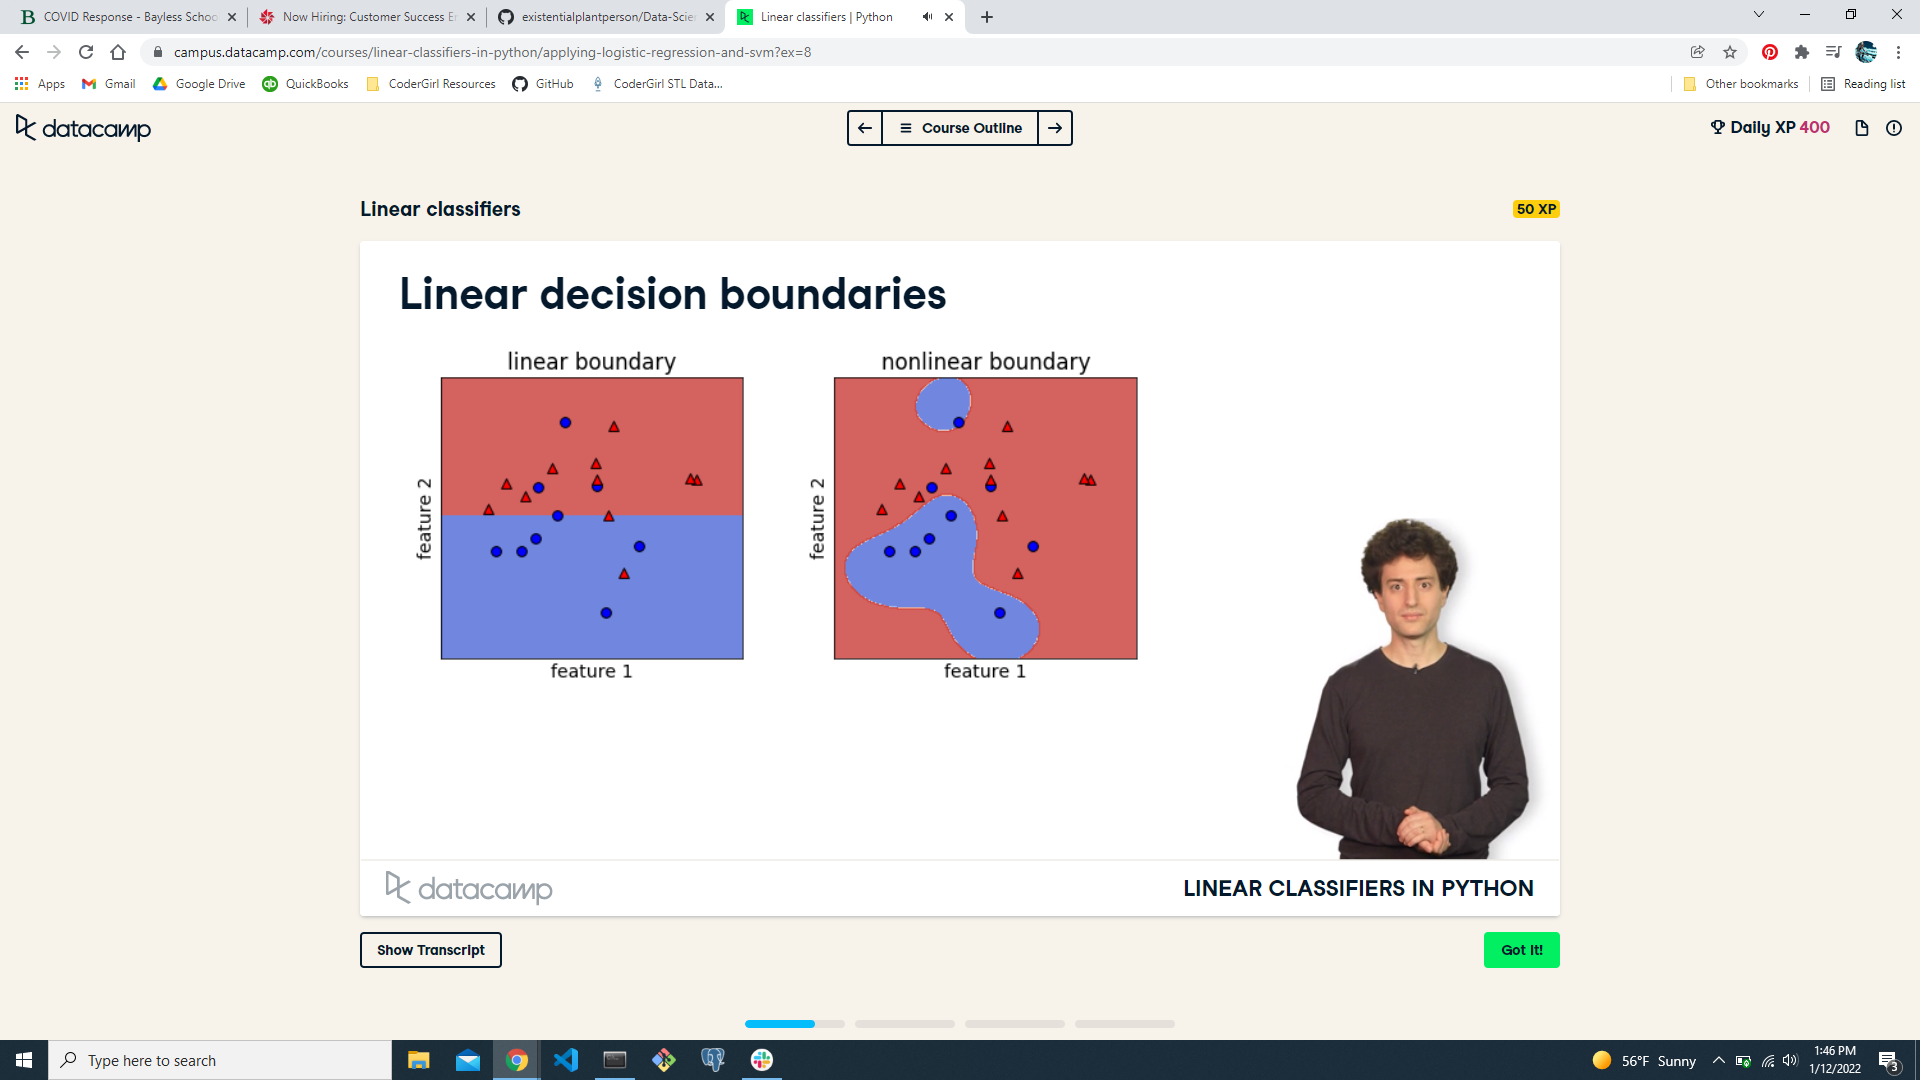
Logistic Regression and SVM are linear classifiers and learn linear decision boundraries

vocabulary
- classification - learning to predict categories
- decision boundary - the surface separating different predicted classes
- linear classifier - a classifier that learns linear decision boundaries 
- linearly separable - a data set can be perfectly explained by a linear classifier
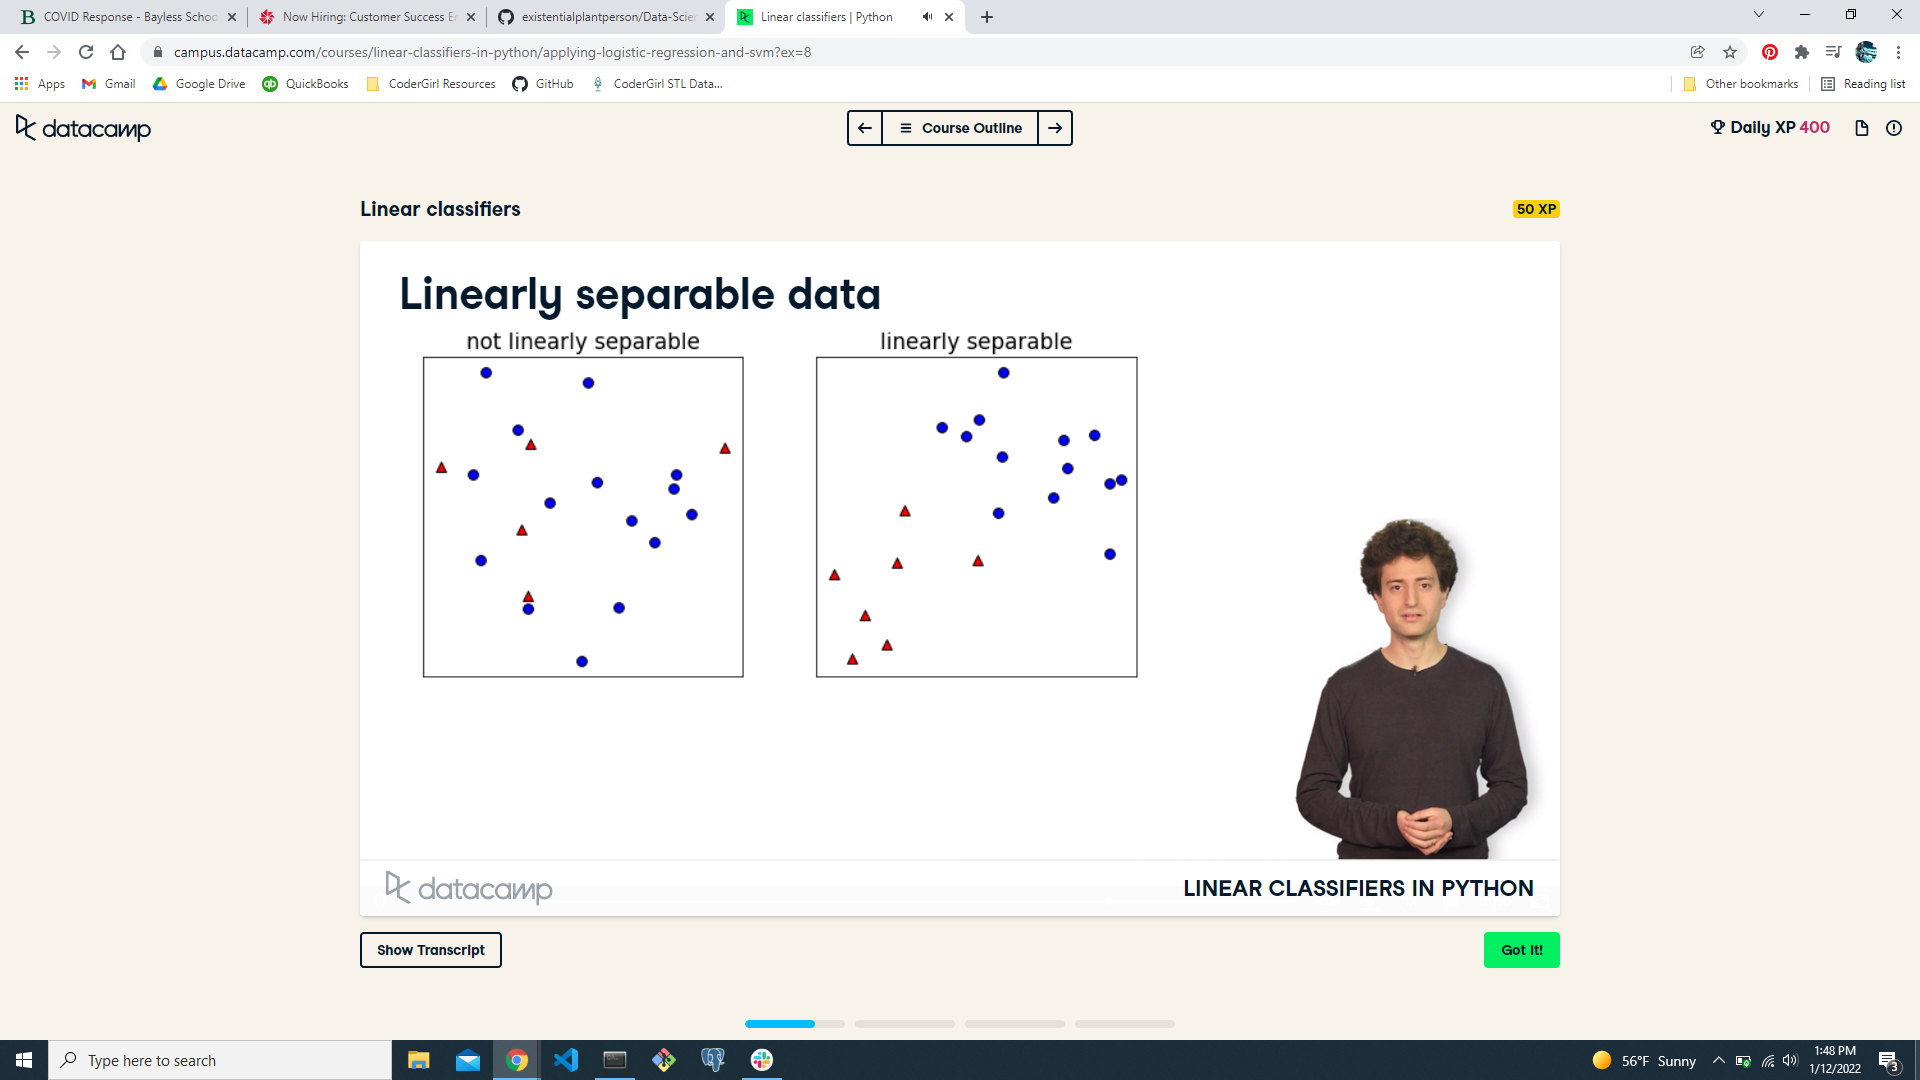

how are logistic reg and SVM different?

In [ ]:
## Visualizing decision boundaries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X,y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

OUTPUT:
    LogisticReg and LinearSVM are linear classifiers
    SVM and KNN are nonlinear classifiers

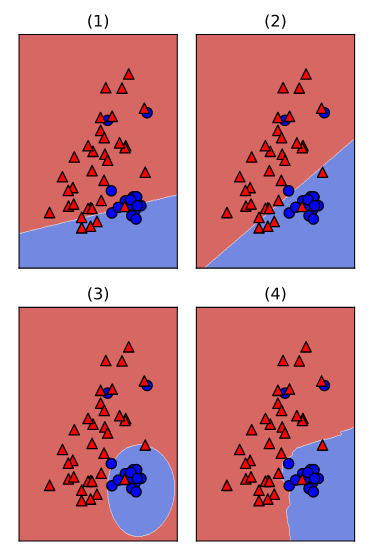

##### Linear classifiers: the coefficients
    dot products
    X = np.arange(3) = array([0,1,2])
    y = np.arange(3,6) = array([3,4,5])
    x*y = array([0,4,10])
    np.sum(x*y) = 14 

    same as using x@y = 14 for dot product of x and y
    
- linear classifier prediction (same for LogReg, and LinSVM)
    - raw model output = coefficients (dot) features + intercept
    linear classifier prediction: compute raw model output, check the sign
        - if +, predict one class
        - if -, predict the other class
    same for LogReg and LinSVM
        - .fit() is different, but .predict() is the same

- how LogReg makes predictions
    - raw model output = coefficients (dot) features + intercept
            lr = LogisticRegression()
            lr.fit(X,y)
            lr.predict(X)[10]
            OUTPUT: 0
            lr.predict(X)[20]
            OUTPUT: 1
            
            lr.coef_ @ X[10] + lr.intercept_   #raw model output
            OUTPUT: array([-33.79])
            lr.coef_ @ X[20] + lr.intercept_
            OUTPUT: array([0.08])
    - sign tells you which side of the decision boundary the point is on
    - the value gets smaller as you approach the boundary

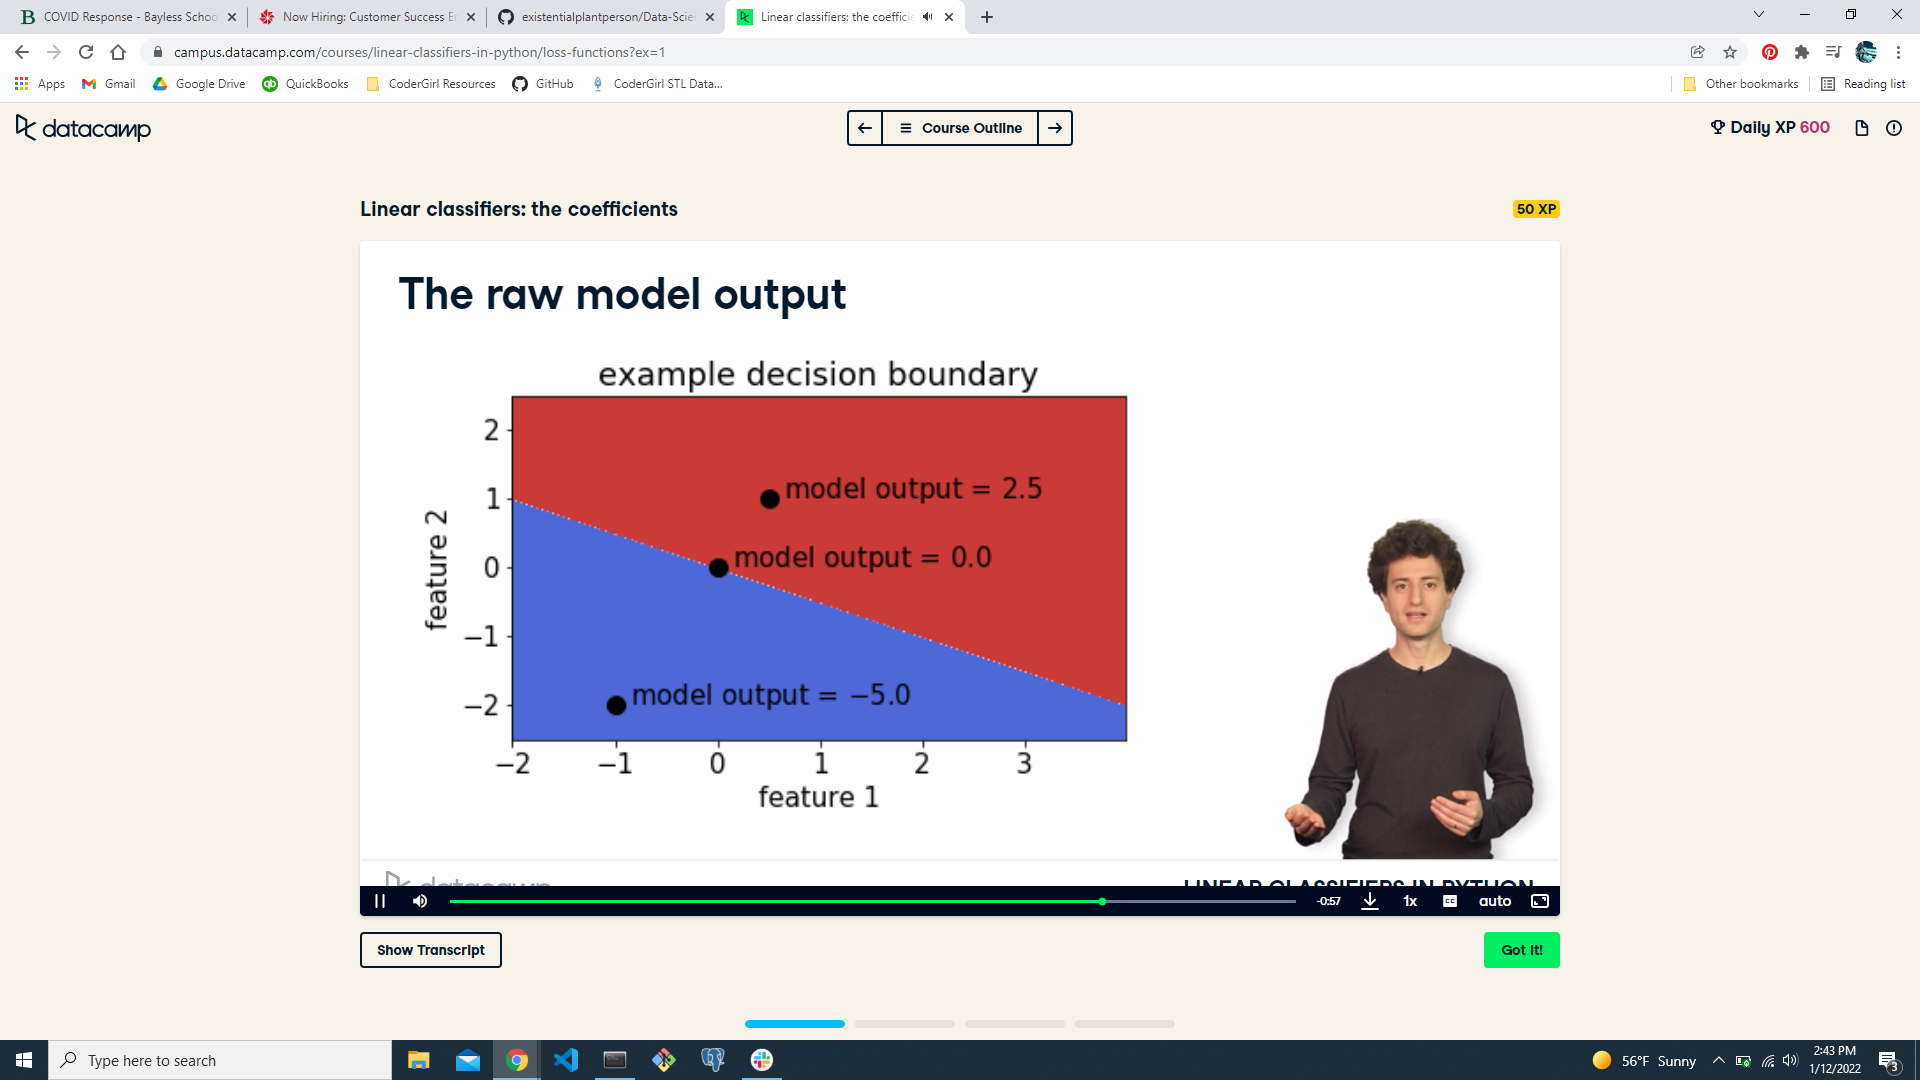

In [ ]:
## experiment with coefficients (slope) and intercept to see change in 
# Set the coefficients
model.coef_ = np.array([[-1,2]])
model.intercept_ = np.array([-5])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

##### What is a loss function?
Least squares linear regression minimizes sum of squares of errors (minimizes loss)

classification errors - can't use loss sunction on categories
- a natural loss for classification is th number of errors
- 0-1 loss: 0 for correct and 1 for incorrect
- this loss can be hard to minimize in practice

minimizing a loss
    from scipy.optimize import minmize
    minimize(np.square, 0).X
    OUTPUT: array([0.]))
    Correct because something squared must be positive so the smallest values possible is 0 - our guess was correct
    
    minimize(np.square, 2).X
    OUTPUT: array([-1.89e-08])

- minimize the squared errors from linear regression, inputs are model coefficients
- answer question: what values of model coefficients make the squared error as small as possible
